In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ds1 = load_dataset("jordane95/msmarco-passage-corpus-with-query")
# ds2 = load_dataset("SetFit/insincere-questions")
ds3 = load_dataset("anon-betterbench/betterbench-b1-all-questions")

In [17]:
df3 = ds3['train'].to_pandas()

In [18]:
df3.head()

,title,chunk_uuid,chunk_location_id,chunk_size,chunk,summary,document_type,document_name,unique_document_id,source_text,...,reasoning,kind,estimated_difficulty,generating_model,citation_match_statistics,question_identifier,previous_chunk_uuid,previous_chunk,next_chunk_uuid,next_chunk
0,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,The chunk describes the Mentu program as being...,analytical,3,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",6d19739f-9d9a-419a-bb36-00bfc9fe0c6d,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
1,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,The chunk explicitly states that the lack of r...,analytical,4,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",633b998e-1809-44cc-811a-0bc822cf4634,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
2,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,This question encourages the application of in...,application,4,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",2fd7aeaf-7034-49f2-aa2b-f5253165157b,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
3,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,This question encourages the exploration of va...,application,3,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",45af7741-6cda-4241-849b-0254c6fbc136,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."
4,Three ways McKinsey is partnering to transform...,2199f6af-4f4f-46da-ab11-a5d164d3e92d,0,1354,"September 27, 2024A projected 80 percent of si...",This document highlights McKinsey's efforts to...,corporate,mckinsey_blog_post,f3370f14-180d-4375-8255-7c41417a61c9,# Three ways McKinsey is partnering to transfo...,...,Understanding how AI is utilized in the Mentu ...,clarification,3,gpt-4o-mini,"{'match_ratio_mean': 1.0, 'match_ratio_median'...",42e72de5-47f3-4cf7-a020-5857d64396a0,None,"No previous chunk, end of document.",89de7b59-4f68-486e-b800-ec9956b3cd8f,"“Every mission is highly relevant, and student..."


In [19]:
df3 = df3[["title","chunk","document_type","document_analysis","chunk_analysis",
           "potential_question_directions","best_direction","question","answer","kind"]]
df3 = df3[df3["kind"] != "true-false"]
df3.reset_index(inplace = True)
df3.drop("index",axis = 1,inplace = True)

In [20]:
df3.head()

,title,chunk,document_type,document_analysis,chunk_analysis,potential_question_directions,best_direction,question,answer,kind
0,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[What are the implications of the statistic re...,The best question to ask is: 'How does the Men...,How does the Mentu program aim to engage stude...,The Mentu program aims to engage students by p...,analytical
1,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document outlines McKinsey's strategic par...,The chunk presents a critical issue in Latin A...,[What challenges do students in Latin America ...,The best question to ask is: 'What potential l...,What potential long-term effects could the lac...,The lack of reading comprehension among sixth ...,analytical
2,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[How could the Mentu program be adapted for us...,The best question to ask is: 'How can the succ...,How can the success of Mentu in Colombia infor...,The success of Mentu can inform educational st...,application
3,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[How could the Mentu program be adapted for us...,The best question to ask is: 'What strategies ...,What strategies could be implemented to increa...,Strategies to increase student engagement in p...,application
4,Three ways McKinsey is partnering to transform...,"September 27, 2024A projected 80 percent of si...",corporate,The document discusses McKinsey's initiatives ...,This chunk highlights the alarming statistic t...,[What specific skills does the Mentu program a...,The best question to ask is: 'How does the Men...,How does the Mentu program utilize AI in teach...,The Mentu program uses AI to create an engagin...,clarification


In [21]:
df3.groupby("document_type").count()

,title,chunk,document_analysis,chunk_analysis,potential_question_directions,best_direction,question,answer,kind
document_type,,,,,,,,,
corporate,21245,21245,21245,21245,21245,21245,21245,21245,21245
financial,5141,5141,5141,5141,5141,5141,5141,5141,5141
government,96246,96246,96246,96246,96246,96246,96246,96246,96246
health,35368,35368,35368,35368,35368,35368,35368,35368,35368
legal,56152,56152,56152,56152,56152,56152,56152,56152,56152
misc,19469,19469,19469,19469,19469,19469,19469,19469,19469
news,4976,4976,4976,4976,4976,4976,4976,4976,4976
research,55936,55936,55936,55936,55936,55936,55936,55936,55936


In [22]:
#analytical application clarification conceptual counterfactual edge case factual false premise open-ended	true-false

In [23]:
#Removed since this kind doesnt contains questions.
df3[df3["kind"] == "true-false"]["potential_question_directions"]

Series([], Name: potential_question_directions, dtype: object)

In [24]:
import re
def clean_latex(text):
    # Remove LaTeX commands like {\\displaystyle}, {\\text{}}, etc.
    cleaned_text = re.sub(r'\\displaystyle|\\text\{.*?\}', '', text)
    
    # Remove any LaTeX curly braces and unnecessary whitespaces
    cleaned_text = re.sub(r'\\[a-z]+|{|}', '', cleaned_text)
    
    # Replace LaTeX-specific representations like \\dots with their equivalent
    cleaned_text = re.sub(r'\\dots', '...', cleaned_text)
    
    # Remove multiple spaces introduced by LaTeX removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

In [25]:
# df3["chunk"] = [clean_latex(i) for i in list(df3["chunk"])]

In [26]:
temp = df3[df3["document_type"] == "research"]
temp.reset_index(inplace=True)

In [27]:
random_num = [1,20,100,500,1000,2000,5000,10000,20000,21000]
for i in random_num:
    print(temp["chunk"][i])
    print()
    print(temp["potential_question_directions"][i])
    print(temp["kind"][i])
    print()

% Template for Blind SLT-2024 paper; to be used with: % spconf.sty - ICASSP/ICIP LaTeX style file, and % IEEEbib.bst - IEEE bibliography style file. % -------------------------------------------------------------------------- % Source file for this paper's figures are here: https://docs.google.com/presentation/d/1z9X-JeSFIzI1VpzOLs2WTltX1I03vqQiLkUnE8YEBFE/edit?usp=sharing \documentclass{article} \usepackage{spconf,amsmath,graphicx} \usepackage{amsfonts} \usepackage{verbatim, tcolorbox} \usepackage{multicol} \usepackage{multirow} \usepackage{graphicx} \usepackage{hyperref} % Example definitions.

[]
application

% -------------------- \def\x{{\mathbf x}} \def\L{{\cal L}} \newcommand{\dilek}[1]{\textcolor{red}{[\textbf{Dilek:} #1]}} \newcommand{\suvodip}[1]{\textcolor{green}{[\textbf{SD:} #1]}} \newcommand{\jenny}[1]{\textcolor{blue} {[\textbf{Jenny:} #1]}} \title{Confidence Estimation for LLM-Based Dialogue State Tracking} \name{Yi-Jyun Sun, Suvodip Dey, Dilek Hakkani-Tür, Gokhan Tur }

In [32]:
from transformers import BartForConditionalGeneration, BartTokenizer, TrainingArguments
from tqdm import tqdm
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
tokenizedLengthList = []
for chunk in tqdm(list(df3["chunk"])):
    input_tokenized = tokenizer(chunk,return_tensors='pt')
    tokenizedLength = len(input_tokenized["input_ids"][0])
    tokenizedLengthList.append(tokenizedLength)

100%|██████████| 294533/294533 [05:46<00:00, 850.58it/s] 


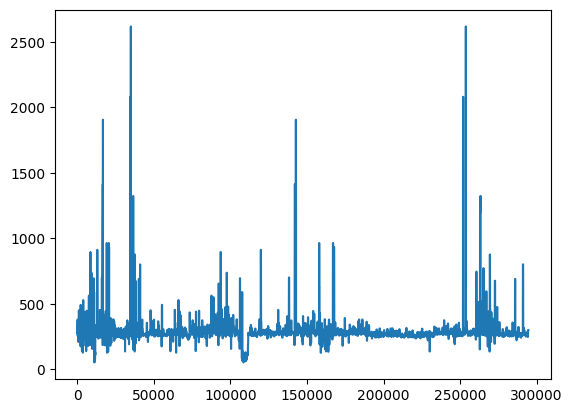

In [52]:
plt.plot(tokenizedLengthList)

In [50]:
df3["chunkTokenLength"] = tokenizedLengthList

In [56]:
tokenizedLengthList = []
for question in tqdm(list(df3["potential_question_directions"])):
    input_tokenized = tokenizer(str(question),return_tensors='pt')
    tokenizedLength = len(input_tokenized["input_ids"][0])
    tokenizedLengthList.append(tokenizedLength)

100%|██████████| 294533/294533 [01:56<00:00, 2529.97it/s]


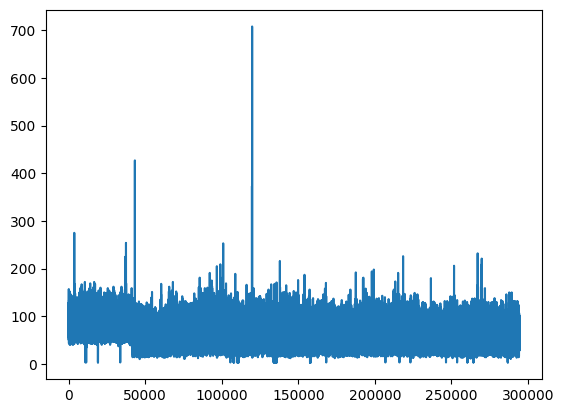

In [57]:
plt.plot(tokenizedLengthList)

In [58]:
df3["questionTokenLength"] = tokenizedLengthList

In [61]:
df3 = df3[df3["questionTokenLength"]<220]

In [63]:
df3 = df3[df3["chunkTokenLength"] < 1000]

In [65]:
df3.reset_index(inplace=True)

In [76]:
df3.sample(frac = 1)
df3.reset_index(inplace=True)
df3.drop("index",axis = 1,inplace = True)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_7612\766189919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("index",axis = 1,inplace = True)


In [78]:
df3.to_csv("../Data/CleanedDatasets/QuestionGenerator.csv")

In [2]:
df3 = pd.read_csv("../Data/CleanedDatasets/QuestionGenerator.csv")

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3["chunk"],df3["potential_question_directions"], test_size=0.1, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [24]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = '../Saved_Models/QuestionGenerator/fine-tuned-bert-sentiment_{}'.format("2024_11_18_1")
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model = model.to(device)

In [13]:
li = [110,20,50,100,345,565,763,642,3232,35,62,543,5,356,235,776]
for idx in li:
    input_text = X_test.tolist()[idx]
    print(input_text)
    print()
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    output = model.generate(
        input_ids, 
        max_length=220, 
        num_beams=5, 
        early_stopping=True, 
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        num_return_sequences=1,  # Number of sequences to return
        temperature=0.7,  # Sampling temperature
        top_k=50,  # Top-K sampling
        top_p=0.9  # Top-p (nucleus) sampling
    )
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    print("True Answer",y_test.tolist()[idx])
    print("Pred Answer:", response)
    print()

\textbf{Naive Finetune.} Human evaluators exhibited a stronger preference for preference agent outputs over naive fine-tuning compared to GPT-4o. Post-annotation interviews revealed that naive fine-tuning often resulted in hallucinations of crucial information, a phenomenon not effectively penalized by automated metrics but disliked by humans. \textbf{No Baseline Agent.} The preference agent trained without access to zero-shot baseline information exhibits competitive performance, particularly when considering the marginal reduction in inference cost it offers. This makes it a viable alternative in scenarios where minimizing inference cost is a priority, even if it comes with a slight compromise in performance compared to the distillation-based approach. Both automated and human evaluations confirm that our preference agent significantly improves the alignment of LLM outputs with individual user styles and preferences, as discussed in Section \ref{discussion:why-ft-more-effective}. The

In [26]:
query = "The architecture of a generic GNN implements the following fundamental layers:[6]Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph. In the literature, permutation equivariant layers are implemented via pairwise message passing between graph nodes.[6][11] Intuitively, in a message passing layer, nodes update their representations by aggregating the messages received from their immediate neighbours. As such, each message passing layer increases the receptive field of the GNN by one hop.Local pooling: a local pooling layer coarsens the graph via downsampling. Local pooling is used to increase the receptive field of a GNN, in a similar fashion to pooling layers in convolutional neural networks. Examples include k-nearest neighbours pooling, top-k pooling,[26] and self-attention pooling.[27]Global pooling: a global pooling layer, also known as readout layer, provides fixed-size representation of the whole graph. The global pooling layer must be permutation invariant, such that permutations in the ordering of graph nodes and edges do not alter the final output.[28] Examples include element-wise sum, mean or maximum.It has been demonstrated that GNNs cannot be more expressive than the Weisfeiler–Leman Graph Isomorphism Test.[29][30] In practice, this means that there exist different graph structures (e.g., molecules with the same atoms but different bonds) that cannot be distinguished by GNNs. More powerful GNNs operating on higher-dimension geometries such as simplicial complexes can be designed.[31][32][10] As of 2022, whether or not future architectures will overcome the message passing primitive is an open research question.[11]"

In [28]:
input_text = query
print(input_text)
print()
input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
output = model.generate(
    input_ids, 
    max_length=220, 
    num_beams=5, 
    early_stopping=True, 
    no_repeat_ngram_size=2,  # Prevent repeating n-grams
    num_return_sequences=1,  # Number of sequences to return
    temperature=0.7,  # Sampling temperature
    top_k=50,  # Top-K sampling
    top_p=0.9  # Top-p (nucleus) sampling
)
response = tokenizer.decode(output[0], skip_special_tokens=True)
# print("True Answer",y_test.tolist()[idx])
print("Pred Answer:", response)
print()

The architecture of a generic GNN implements the following fundamental layers:[6]Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph. In the literature, permutation equivariant layers are implemented via pairwise message passing between graph nodes.[6][11] Intuitively, in a message passing layer, nodes update their representations by aggregating the messages received from their immediate neighbours. As such, each message passing layer increases the receptive field of the GNN by one hop.Local pooling: a local pooling layer coarsens the graph via downsampling. Local pooling is used to increase the receptive field of a GNN, in a similar fashion to pooling layers in convolutional neural networks. Examples include k-nearest neighbours pooling, top-k pooling,[26] and self-attention pooling.[27]Global pooling: a global pooling layer, also known as readout layer, provides fixed-size representation of the who

## Collect Data

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
import networkx as nx
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup
from googlesearch import search

In [2]:
def get_google_search_links(query):
    return [link for link in search(query)]
def index_of_true(priority_tags):
    key_true = []
    for tag in priority_tags.keys():
        if priority_tags[tag] == True:
            key_true.append(tag)
        else:
            pass
    return key_true

def find_nested_links(tag):
    links = []
    nested_tags = tag.find_all('a')
    if len(nested_tags) != 0:
        for i in nested_tags:
            try:
                links.append(str(i).split(" ")[1].split("href=")[1]) #Storing the links
            except IndexError as index_error:
                pass
    return links

def adjust_tags_based_on_priority(priority_tags,tag_name,record_tags,index_value):
    #if less priority tags are already present and new high priority tag comes, we will make all low priority tag to false and high priority tag true
    #if less priority tags comes and high priority tag is True, We will keep all same and make low priority task true
    values = list(priority_tags.values())
    keys = list(priority_tags.keys())
    all_indexes_with_true = []
    for i in range(0,len(values)):
        if values[i]:
            all_indexes_with_true.append(i)
        else:
            pass
    if len(all_indexes_with_true) == 0:
        #If no tags are true, we will make the target tag true and return the same.
        priority_tags[tag_name] = not priority_tags[tag_name]
        record_tags[tag_name].append(index_value)
        return priority_tags,record_tags,""
    else:
        priority_type = "high" #high or low
        idx = keys.index(tag_name)
        if idx <= min(all_indexes_with_true):
            priority_type = "high"
            for k in keys:
                priority_tags[k] = False
            priority_tags[tag_name] = True
            record_tags[tag_name].append(index_value)
            return priority_tags,record_tags,"high"
        elif idx >= max(all_indexes_with_true):
            priority_type = "low"
            priority_tags[tag_name] = True
            record_tags[tag_name].append(index_value)
            return priority_tags,record_tags,"low"
        else:
            priority_type = "mid"
            # print('Index of mid tag',idx)
            for k in keys[idx+1:]:
                priority_tags[k] = False
            priority_tags[tag_name] = True
            record_tags[tag_name].append(index_value)
            return priority_tags,record_tags,"mid"
            #Make all the tags with less priority than current tag to false. And make the current tag true

def create_network_graph(indexing,sub_indexing,nxG,type,priority_tags,parent_node,record_tags):
    if type == "high":
        nxG.add_edge(parent_node,indexing)
    elif type == "low" or type == "mid":
        key_true = index_of_true(priority_tags)[:-1]
        # print("KGLA_structure --> index_of_true",key_true[-1])
        new_edge = record_tags[key_true[-1]][-1]
        nxG.add_edge(new_edge,indexing)
        for v in sub_indexing:
            nxG.add_edge(indexing, v)
        return nxG
    else:
        nxG.add_edge(parent_node,indexing)
    for v in sub_indexing:
            nxG.add_edge(indexing, v)
    return nxG
def clean_data(link):
    r = requests.get(link)
    soup = BeautifulSoup(r.content, 'html5lib')
    h1_tag = str(soup.find('h1'))
    try:
        parent_node = soup.find('title').text
        if parent_node == '403 Forbidden':
            return [],""
    except Exception as e:
        # print(link)
        parent_node = soup.find('h1').text
    for tag in soup(['nav', 'header', 'footer', 'script', 'style', 'aside']):
        tag.decompose()
    imp_tags = soup.find_all(['h1', 'h2', 'h3', 'h4','h5','strong', 'p', 'li'])
    imp_tags.insert(0,BeautifulSoup(h1_tag, 'html5lib').find("h1"))
    return imp_tags,parent_node

def adjust_pending_task(nxG,pendingTopics):
    see_also = list(nxG.adj[0].keys())[1:]
    for i in see_also:
        if text_index[i] == 'See also':
            topics = list(nxG.adj[i].keys())
            pendingTopics.extend([text_index[j].lower().split("\xa0–")[0] for j in topics if text_index[j].lower().split("\xa0–")[0] not in pendingTopics])
        else:
            pass
    return pendingTopics
def generate_heading(hl,r):
    temp = []
    if len(hl) == 0:
        # print(r)
        return r
    else:
        for h in hl:
            # print(r)
            # print(list(nxG.adj[h]))
            temp.append(generate_heading(list(nxG.adj[h])[1:],r+'->'+str(h)))
        return temp

In [3]:
def priority_based_structure(imp_tags,parent_node):
    priority_tags = {"h1":False,"h2":False,"h3":False,"h4":False,"h5":False,"strong":False,"p":False,"li":False,"a":False}
    record_tags = {"h1":[],"h2":[],"h3":[],"h4":[],"h5":[],"strong":[],"li":[],"p":[],"a":[]}
    text_index = {}
    indexing = 0
    links = []
    nxG = nx.Graph()
    nxG.add_node(parent_node)
    for idx,tag in enumerate(imp_tags):
        key_true = index_of_true(priority_tags)
        if len(key_true) == 0 and tag.name in ["ul","li","ol"]: #If there is no heading, We will find the link and store them directly in a list for futher scraping
            links.extend(find_nested_links(tag))
        else:
            text_index[indexing] = tag.text
            nested_links = find_nested_links(tag)
            links.extend(nested_links)
            step_size = 0.001
            sub_indexing = []
            priority_tags,record_tags,type = adjust_tags_based_on_priority(priority_tags,tag.name,record_tags,indexing)
            nxG = create_network_graph(indexing,sub_indexing,nxG,type,priority_tags,parent_node,record_tags)
            indexing = indexing+1
    return nxG,text_index

In [4]:
completedTopics = []
pendingTopics = ["Mathematics"]

In [6]:
store_data = {"Topic_Name":[],"URL":[],"All_Tags":[],"Text_Index":[],"Network":[]}
counter = 7
for idx,pending in enumerate(pendingTopics):
    print(f'\rProgress: {idx}/{len(pendingTopics)} Topic : {pending}', end='', flush=True)
    if idx % 10 == 0 and idx!=0:
        counter = counter+1
        pd.DataFrame.from_dict(store_data).to_csv('../Data/GraphAgent/{}.tsv'.format(counter),sep='\t', index=False)
        store_data = {"Topic_Name":[],"URL":[],"All_Tags":[],"Text_Index":[],"Network":[]}
    if len(completedTopics) == 0:
        startLink = "https://en.wikipedia.org/wiki/{}".format(pendingTopics[0].replace(" ","_"))
        imp_tags,parent_node = clean_data(startLink)
        if len(imp_tags) == 0:
            continue
        nxG,text_index = priority_based_structure(imp_tags,parent_node)
        completedTopics.append(pendingTopics[0])
        pendingTopics = adjust_pending_task(nxG,pendingTopics)
        list_headings = []
        root_node = list(nxG.adj[parent_node])
        for idx,r in enumerate(root_node):
            # print(list(nxG.adj[r]))
            hl = list(nxG.adj[r])
            list_headings.extend(generate_heading(hl[1:],str(r)))
        store_data["Topic_Name"].append(pendingTopics[0])
        store_data["URL"].append(startLink)
        store_data["Text_Index"].append(text_index)
        store_data["Network"].append(list_headings)
        store_data["All_Tags"].append(imp_tags)
    else:
        links = get_google_search_links(pending)
        wiki_link = "https://en.wikipedia.org/wiki/{}".format(pending.replace(" ","_"))
        if wiki_link not in links:
            links.append(wiki_link)
        else:
            pass
        for idx2,link in enumerate(links):
            # print(f'\rProgress: {idx}.{idx2}/{len(pendingTopics)} Topic : {pending}', end='', flush=True)
            if (".gov" not in link) and ("linkedin.com" not in link) and ("reddit.com" not in link):
                try:
                    imp_tags,parent_node = clean_data(link)
                    nxG,text_index = priority_based_structure(imp_tags,parent_node)
                    completedTopics.append(pending)
                    pendingTopics = adjust_pending_task(nxG,pendingTopics)
                    root_node = list(nxG.adj[parent_node])
                    list_headings = []
                    for idx,r in enumerate(root_node):
                        # print(list(nxG.adj[r]))
                        hl = list(nxG.adj[r])
                        list_headings.extend(generate_heading(hl[1:],str(r)))
                    store_data["Topic_Name"].append(pending)
                    store_data["URL"].append(link)
                    store_data["Text_Index"].append(text_index)
                    store_data["Network"].append(list_headings)
                    store_data["All_Tags"].append(imp_tags)
                except Exception as e:
                    pass
            else:
                pass
        # break

Progress: 10/41 Topic : mathematics educationopics

KeyboardInterrupt: 

In [128]:
# df = pd.DataFrame.from_dict(store_data)
# # df['All_Tags'] = df['All_Tags'].astype(bytes)
# # df.to_parquet('my_data.parquet')
# df = df.map(str)
# df.to_parquet("my_data.parquet",compression="gzip")